In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
V = 42
E = 87
fin_country = open("europe.txt")
fin_edges = open("dist.txt")
country = []  
edges = []  
G = nx.Graph()  
matrix = [[] for i in range(V)] 
for i in range(V):
    pars_one = fin_country.readline().split('.')
    num, name = pars_one[0], pars_one[1][:-1]
    country.append(name)

for i in range(E):
    pars_two = fin_edges.readline().split()
    a, b = int(pars_two[0]), int(pars_two[1])
    matrix[a].append(b)
    matrix[b].append(a)
    edges.append([a, b])

In [3]:
for i in range(E):
    a, b = edges[i]
    G.add_edge(country[a], country[b])
friends = [0 for i in range(V)]
colors = [-1 for i in range(V)]

In [4]:
#BFS
def bfs(first):
    global matrix, friends, colors
    q = [first]
    q1 = []
    while q:
        x = q.pop()
        if friends[x] == 0:
            colors[x] = 1
        else:
            colors[x] = 0

        for v in matrix[x]:
            if colors[v] == -1:
                friends[v] = max(friends[v], colors[x])
                q1.append(v)

        if not q:
            q = q1[:]
            q1 = []


In [5]:
first = 0
(first)
colors_map = dict()
c = 0
for i in colors:
    colors_map[country[c]] = i
    if i == 1:
        print(country[c], end=', ')
    c += 1

val = [colors_map.get(node, 0.25) for node in G.nodes()]
print()

Albania, CzechRepublic, Denmark, Estonia, Finland, Lithuania, Luxembiurg, Monaco, Netherlands, SanMarino, Serbia, Slovenia, Spain, Switzerland, Turkey, Ukraine, Vatica, 


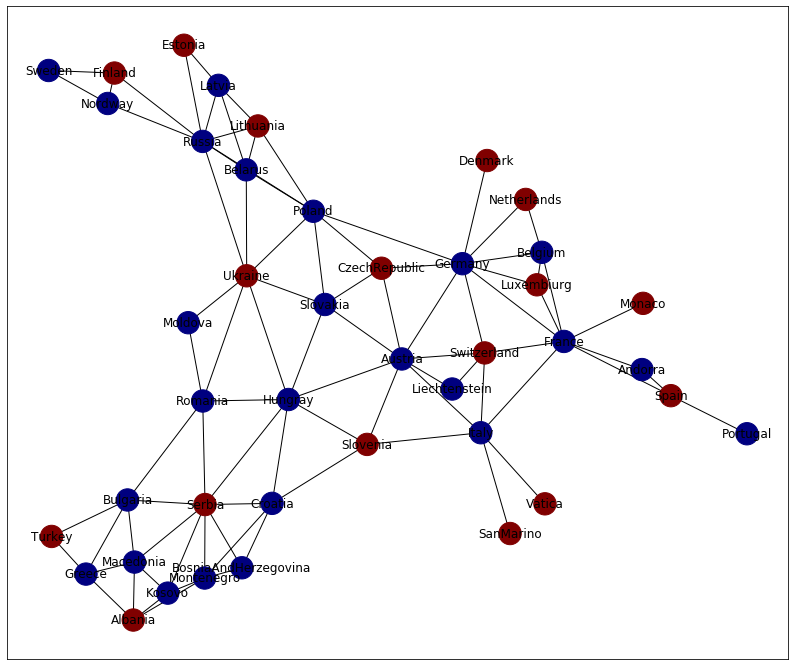

In [6]:
plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size=500, node_color=val)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.show()